# Machine Learning Project

In [1]:
#pandas - they standard data manipulation package
import pandas as pd
#numpy - scientific computation - matrix operations, etc.
import numpy as np
#for feature selection
from sklearn import feature_selection
import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-013fe1b52222>:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
train = pd.read_csv('/Users/apple/Desktop/MLproject/application_train.csv')

#Kaggle question: should we be pre-splitting our data into train / test at this stage?

# EDAs

In [3]:
#Some EDA:

# checking missing data
total_null = train.isnull().count()
percent = (train.isnull().sum()/train.isnull().count()*100)
missing_check  = pd.concat([total_null, percent], axis=1, keys=['Total Null', 'Percent']).sort_values(ascending = False, by = ['Percent'])
missing_check.head(10)

#Sanity check - does it make sense for these to be missing?

,Total Null,Percent
COMMONAREA_MEDI,307511,69.872297
COMMONAREA_AVG,307511,69.872297
COMMONAREA_MODE,307511,69.872297
NONLIVINGAPARTMENTS_MODE,307511,69.432963
NONLIVINGAPARTMENTS_AVG,307511,69.432963
NONLIVINGAPARTMENTS_MEDI,307511,69.432963
FONDKAPREMONT_MODE,307511,68.386172
LIVINGAPARTMENTS_MODE,307511,68.354953
LIVINGAPARTMENTS_AVG,307511,68.354953
LIVINGAPARTMENTS_MEDI,307511,68.354953


In [4]:
drop = missing_check[missing_check['Percent'] > 30].index.values

print(len(drop))

50


In [5]:
train = train.drop(drop, axis=1)

In [6]:
#Let's define a function for our data exploration - a KDE plot

def kde_plot (df, var_name):
    plt.figure(figsize = (12, 6))
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df[df['TARGET'] == 0][[var_name]].to_numpy().reshape(-1), label = 'TARGET == 0')
    sns.kdeplot(df[df['TARGET'] == 1][[var_name]].to_numpy().reshape(-1), label = 'TARGET == 1')
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


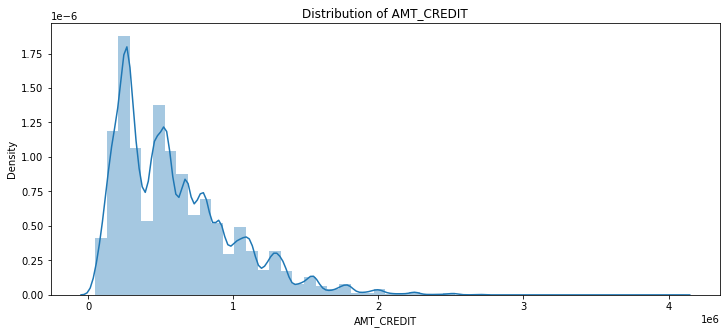

In [7]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train["AMT_CREDIT"])

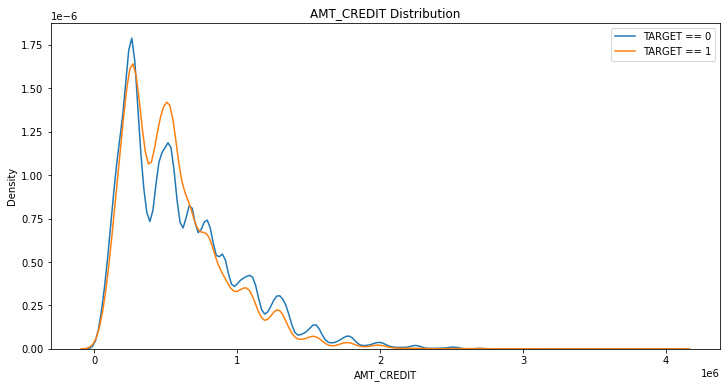

In [8]:
kde_plot(train, 'AMT_CREDIT')

In [9]:
#for categorical variables, we can just visualize in a bar chart (or table)

def pop_rate (target):
    return target.sum() / target.count()


train.groupby('NAME_TYPE_SUITE').agg({'TARGET': [pop_rate, 'count']})

TARGET        
                 pop_rate   count
NAME_TYPE_SUITE                  
Children         0.073768  3267  
Family           0.074946  40149 
Group of people  0.084871  271   
Other_A          0.087760  866   
Other_B          0.098305  1770  
Spouse, partner  0.078716  11370 
Unaccompanied    0.081830  248526

In [10]:
#read in additional data - cash balance

cash_balance = pd.read_csv ('/Users/apple/Desktop/MLproject/credit_card_balance.csv')

In [11]:
#inspect our data

cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [12]:
#Feature ideas?

In [13]:
#cash_balance[["MONTHS_BALANCE", "AMT_BALANCE"]] = cash_balance[["MONTHS_BALANCE", "AMT_BALANCE"]].apply(pd.to_numeric)


cash_balance_feats = cash_balance.groupby('SK_ID_CURR') \
  .apply(lambda x: pd.Series({
      'amt_balance': x['AMT_BALANCE'].sum(),
      'amt_balance_0_1_year': x['AMT_BALANCE'][x['MONTHS_BALANCE'] >= -12].sum(),
      'amt_balance_1_2_year': x['AMT_BALANCE'][(x['MONTHS_BALANCE'] < -12) & (x['MONTHS_BALANCE'] >= -24)].sum()
  })
)



In [14]:
#spot check our results
cash_balance_feats.head(n=20)

,amt_balance,amt_balance_0_1_year,amt_balance_1_2_year
SK_ID_CURR,,,
100006,0.000,0.000,0.000
100011,4031676.225,0.000,0.000
100013,1743352.245,0.000,0.000
100021,0.000,0.000,0.000
100023,0.000,0.000,0.000
100028,396167.850,131561.010,105494.670
100036,0.000,0.000,0.000
100042,2801919.375,0.000,0.000
100043,6882895.800,0.000,3293125.875


In [15]:
#Spot-check the calculation (QA)

cash_balance.sort_values(by=['MONTHS_BALANCE'],ascending=False)[cash_balance['SK_ID_CURR']==100028]

<ipython-input-15-fe7e2aedfe7a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cash_balance.sort_values(by=['MONTHS_BALANCE'],ascending=False)[cash_balance['SK_ID_CURR']==100028]


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
617886,1914954,100028,-1,37335.915,225000,0.0,22823.550,0.0,22823.550,11250.000,11250.000,11250.000,36270.675,36980.415,36980.415,0.0,4,0.0,4.0,35.0,Active,0,0
1660670,1914954,100028,-2,24710.085,225000,0.0,15009.615,0.0,15009.615,11250.000,11250.000,11250.000,23981.445,24354.585,24354.585,0.0,9,0.0,9.0,34.0,Active,0,0
1835811,1914954,100028,-3,20221.830,225000,0.0,19867.500,0.0,19867.500,0.000,0.000,0.000,19866.330,19866.330,19866.330,0.0,9,0.0,9.0,33.0,Active,0,0
1561465,1914954,100028,-4,0.000,225000,0.0,0.000,0.0,0.000,0.000,1.170,1.170,0.000,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
1460388,1914954,100028,-5,0.000,225000,0.0,0.000,0.0,0.000,0.000,1.170,1.170,0.000,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
1272681,1914954,100028,-6,0.000,225000,0.0,0.000,0.0,0.000,0.000,1.170,1.170,0.000,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
1498585,1914954,100028,-7,0.000,225000,0.0,0.000,0.0,0.000,0.000,1.170,1.170,0.000,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
1384907,1914954,100028,-8,0.000,225000,0.0,0.000,0.0,0.000,6438.330,6440.670,6440.670,0.000,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
3060632,1914954,100028,-9,6438.330,225000,0.0,5996.835,0.0,5996.835,7855.110,7875.000,7875.000,5976.945,6082.830,6082.830,0.0,3,0.0,3.0,32.0,Active,0,0
2466412,1914954,100028,-10,7888.545,225000,0.0,0.000,0.0,0.000,11250.000,11250.000,11250.000,6998.895,7533.045,7533.045,0.0,0,0.0,0.0,31.0,Active,0,0


In [16]:
#look at aggregates - another quick QA

cash_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


# Baseline model from the tutorial

In [17]:
#Supervised learning section starts here:

In [18]:
# Join to the training dataframe
train = train.merge(cash_balance_feats, on = 'SK_ID_CURR', how = 'left')

for col_name in ['amt_balance', 'amt_balance_0_1_year', 'amt_balance_1_2_year']:
    train[col_name] = train[col_name].fillna(0)

# Fill the missing values with 0 
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,amt_balance,amt_balance_0_1_year,amt_balance_1_2_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


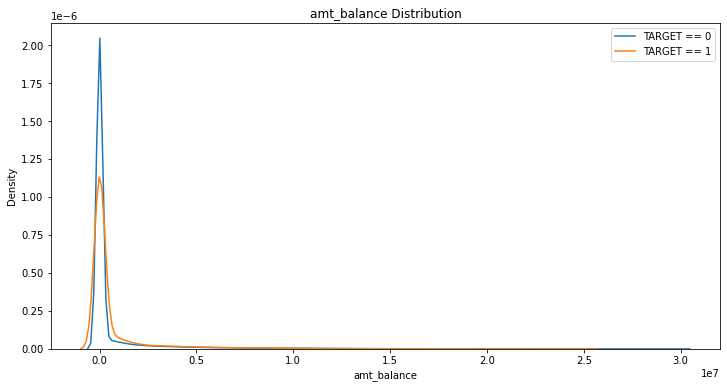

In [19]:
#Is our new feature any good?

kde_plot(train, 'amt_balance')

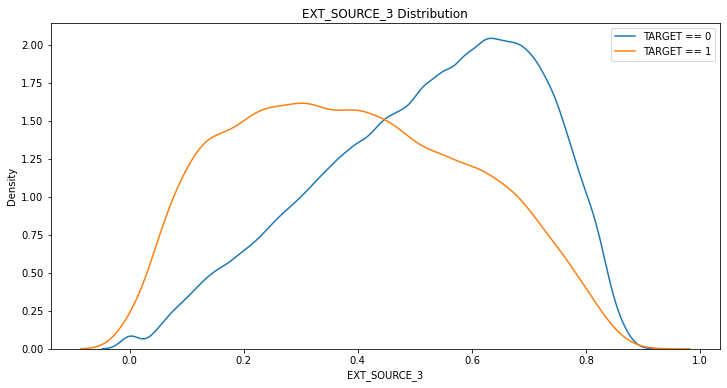

In [20]:
#How about this one?

kde_plot(train, 'EXT_SOURCE_3')

In [21]:
#one-hot encode the categorical variables

train_factorized = pd.get_dummies(train)


#let's pad the rest with 0's (for now)
#clean up infinite values also - just in case

train_factorized.replace([np.inf, -np.inf], np.nan)

for col in list(train_factorized.columns):
    train_factorized[col].fillna(0, inplace = True)
    



In [22]:
#Downsample our data (stratified) for speed 

train_compute_mi_sample = train_factorized[train_factorized['TARGET'] ==1]
train_compute_mi_sample = train_compute_mi_sample.append(train_factorized[train_factorized['TARGET'] ==0].sample(frac = 0.1, replace = False))


In [23]:
#and QA!

print(train_factorized.shape, train_compute_mi_sample.shape)

(307511, 170) (53094, 170)


In [24]:
#Exercise - make + explore more features

# Random Forest (Inclass Example)

In [25]:
# Extract the ids
ids = train_compute_mi_sample['SK_ID_CURR']

# Extract the labels for training
labels = train_compute_mi_sample['TARGET']


features = train_compute_mi_sample.drop(columns = ['SK_ID_CURR', 'TARGET'])

print('Training Data Shape: ', features.shape)

Training Data Shape:  (53094, 168)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=123)

In [27]:
#train a baseline model

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
import gc




In [28]:
#Sampling for speed only 

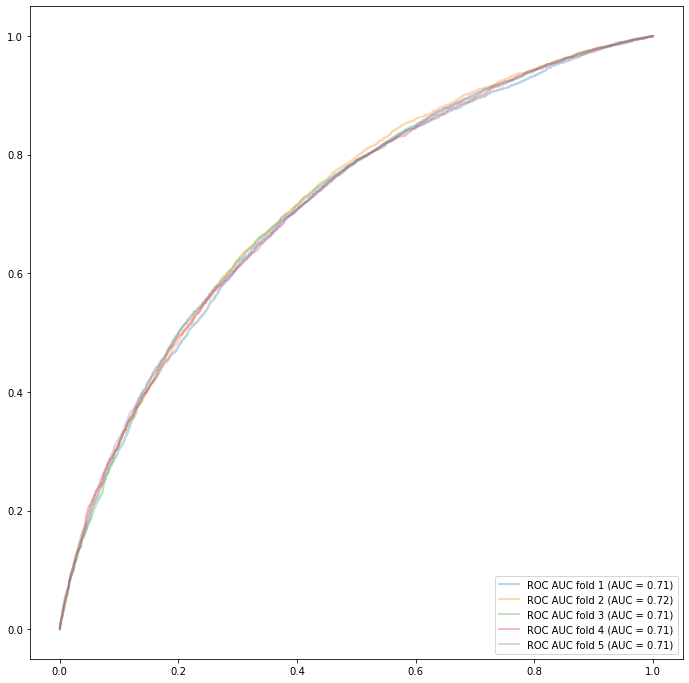

In [29]:
#do k-fold

# make plot
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

# Extract feature names
feature_names = list(features.columns)

# Convert to np arrays
training_matrix = np.array(features)

# Create the kfold object
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)

#make our model object
model = RandomForestClassifier(n_estimators=100, 
                               max_depth = 3, min_samples_split = 200, min_samples_leaf = 50)

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

tprs = []
aucs = []


#fold counter
i=1

for train,test in k_fold.split(features,labels):
    prob = model.fit(features.iloc[train],labels.iloc[train]).predict_proba(features.iloc[test])[:,1]
    fpr, tpr, t = roc_curve(labels.iloc[test], prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC AUC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
plt.legend(loc="lower right")
plt.show()

In [30]:
model = RandomForestClassifier(n_estimators=100, 
                               max_depth = 3, min_samples_split = 200, min_samples_leaf = 50)
model = model.fit(X_train, y_train)
preds = model.predict(X_test)

In [31]:
# confusion matrix
print(metrics.confusion_matrix(y_test,preds))

[[4734  986]
 [2664 2235]]


In [32]:
# precision and recall
print(metrics.classification_report(y_test, preds, digits=3))

              precision    recall  f1-score   support

           0      0.640     0.828     0.722      5720
           1      0.694     0.456     0.550      4899

    accuracy                          0.656     10619
   macro avg      0.667     0.642     0.636     10619
weighted avg      0.665     0.656     0.643     10619



# K-means (Inclass Example)

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [34]:
kmeans = KMeans(n_clusters=10,
                    init= 'k-means++', # smart way of selecting initial clusters to speed up the process
                    max_iter = 300,
                    n_init = 10, # num centroid seeds
                    random_state = 123)
kmeans_results = kmeans.fit(features)

In [35]:
train_clusters = pd.DataFrame(data = {"cluster": kmeans_results.predict(features)}
             ,index = features.index)
onehotencoder = OneHotEncoder()
one_hotted_train_data = pd.DataFrame(
    data = onehotencoder.fit_transform(train_clusters[["cluster"]]).toarray()
    ,index = train_clusters.index)
assert features.shape[0] == one_hotted_train_data.shape[0], "shape is off"
features_with_kmeans = features.join(one_hotted_train_data)

In [36]:
features_with_kmeans.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,amt_balance,amt_balance_0_1_year,amt_balance_1_2_year,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORG

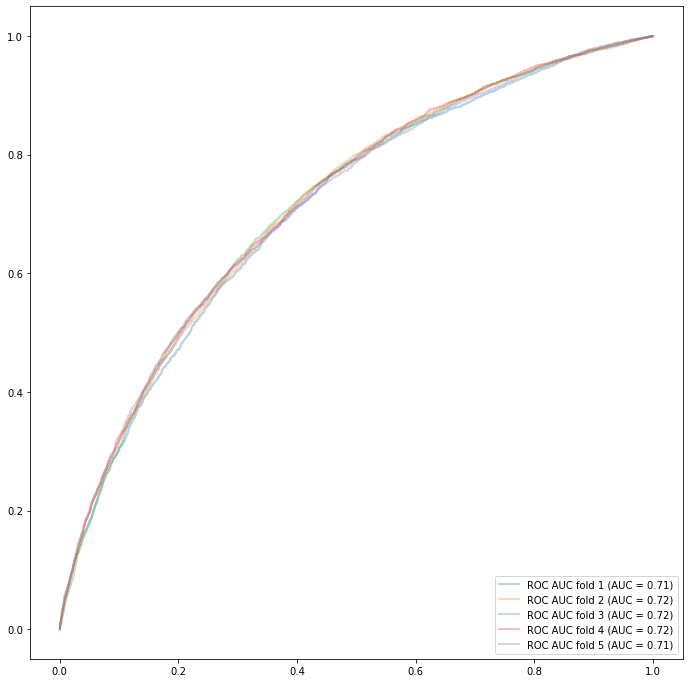

In [37]:
#do k-fold

# make plot
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

features_kmeans = features_with_kmeans

# Extract feature names
feature_names = list(features_kmeans.columns)

# Convert to np arrays
training_matrix = np.array(features_kmeans)

# Create the kfold object
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)

#make our model object
model = RandomForestClassifier(n_estimators=100, 
                               max_depth = 3, min_samples_split = 200, min_samples_leaf = 50)

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

tprs = []
aucs = []


#fold counter
i=1

for train,test in k_fold.split(features,labels):
    prob = model.fit(features_kmeans.iloc[train],labels.iloc[train]).predict_proba(features_kmeans.iloc[test])[:,1]
    fpr, tpr, t = roc_curve(labels.iloc[test], prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC AUC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
plt.legend(loc="lower right")
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features_kmeans, labels, test_size=0.2, random_state=123)

rf = RandomForestClassifier(n_estimators=100, 
                               max_depth = 3, min_samples_split = 200, min_samples_leaf = 50)
rf = rf.fit(X_train, y_train)
preds = rf.predict(X_test)

In [39]:
# confusion matrix
print(metrics.confusion_matrix(y_test,preds))

[[4750  970]
 [2683 2216]]


In [40]:
# precision and recall
print(metrics.classification_report(y_test, preds, digits=3))

              precision    recall  f1-score   support

           0      0.639     0.830     0.722      5720
           1      0.696     0.452     0.548      4899

    accuracy                          0.656     10619
   macro avg      0.667     0.641     0.635     10619
weighted avg      0.665     0.656     0.642     10619



In [41]:
###Exercise:

#Homework: what about if used to segment our models?
#Homework: more feature engineering

In [42]:
# Read in bureau
bureau = pd.read_csv('/Users/apple/Desktop/MLproject/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [43]:
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg([np.mean, np.median,
                     np.min, np.max]).reset_index()
bureau_agg.head()

SK_ID_CURR  DAYS_CREDIT                    CREDIT_DAY_OVERDUE              \
                     mean  median  amin amax               mean median amin   
0  100001    -735.000000  -857.0  -1572 -49   0.0                0.0    0     
1  100002    -874.000000  -1042.5 -1437 -103  0.0                0.0    0     
2  100003    -1400.750000 -1205.5 -2586 -606  0.0                0.0    0     
3  100004    -867.000000  -867.0  -1326 -408  0.0                0.0    0     
4  100005    -190.666667  -137.0  -373  -62   0.0                0.0    0     

       DAYS_CREDIT_ENDDATE                        DAYS_ENDDATE_FACT         \
  amax                mean median    amin    amax              mean median   
0  0    82.428571          -179.0 -1329.0  1778.0 -825.500000       -715.0   
1  0   -349.000000         -424.5 -1072.0  780.0  -697.500000       -939.0   
2  0   -544.500000         -480.0 -2434.0  1216.0 -1097.333333      -621.0   
3  0   -488.500000         -488.5 -595.0  -382.0  -532.500000       -532.5   
4  0    439.333333          122.0 -128.0   1324.0 -123.000000       -123.0   

                 AMT_CREDIT_MAX_OVERDUE                        \
     amin   amax                   mean median amin      amax   
0 -1328.0 -544.0 NaN                    NaN    NaN  NaN         
1 -1185.0 -36.0   1681.029               40.5   0.0  5043.645   
2 -2131.0 -540.0  0.000                  0.0    0.0  0.000      
3 -683.0  -382.0  0.000                  0.0    0.0  0.000      
4 -123.0  -123.0  0.000                  0.0    0.0  0.000      

  CNT_CREDIT_PROLONG                  AMT_CREDIT_SUM                      \
                mean median amin amax           mean     median     amin   
0  0.0                0.0    0    0    207623.571429  168345.00  85500.0   
1  0.0                0.0    0    0    108131.945625  54130.50   0.0       
2  0.0                0.0    0    0    254350.125000  92576.25   22248.0   
3  0.0                0.0    0    0    94518.900000   94518.90   94500.0   
4  0.0                0.0    0    0    219042.000000  58500.00   29826.0   

            AMT_CREDIT_SUM_DEBT                         AMT_CREDIT_SUM_LIMIT  \
       amax                mean   median amin      amax                 mean   
0  378000.0  85240.928571        0.0      0.0  373239.0  0.00000               
1  450000.0  49156.200000        0.0      0.0  245781.0  7997.14125            
2  810000.0  0.000000            0.0      0.0  0.0       202500.00000          
3  94537.8   0.000000            0.0      0.0  0.0       0.00000               
4  568800.0  189469.500000       25321.5  0.0  543087.0  0.00000               

                          AMT_CREDIT_SUM_OVERDUE                   \
  median amin        amax                   mean median amin amax   
0  0.0    0.0  0.000       0.0                    0.0    0.0  0.0   
1  0.0    0.0  31988.565   0.0                    0.0    0.0  0.0   
2  0.0    0.0  810000.000  0.0                    0.0    0.0  0.0   
3  0.0    0.0  0.000       0.0                    0.0    0.0  0.0   
4  0.0    0.0  0.000       0.0                    0.0    0.0  0.0   

  DAYS_CREDIT_UPDATE                    AMT_ANNUITY                       
                mean median  amin amax         mean median amin     amax  
0 -93.142857         -155.0 -155  -6    3545.357143  0.0    0.0  10822.5  
1 -499.875000        -402.5 -1185 -7    0.000000     0.0    0.0  0.0      
2 -816.000000        -545.0 -2131 -43  NaN          NaN    NaN  NaN       
3 -532.000000        -532.0 -682  -382 NaN          NaN    NaN  NaN       
4 -54.333333         -31.0  -121  -11   1420.500000  0.0    0.0  4261.5

In [44]:
# List of column names
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [45]:
# Assign the list of columns names as the dataframe column names
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_median,bureau_DAYS_CREDIT_amin,bureau_DAYS_CREDIT_amax,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_median,bureau_CREDIT_DAY_OVERDUE_amin,bureau_CREDIT_DAY_OVERDUE_amax,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_median,bureau_DAYS_CREDIT_ENDDATE_amin,bureau_DAYS_CREDIT_ENDDATE_amax,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_median,bureau_DAYS_ENDDATE_FACT_amin,bureau_DAYS_ENDDATE_FACT_amax,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_median,bureau_AMT_CREDIT_MAX_OVERDUE_amin,bureau_AMT_CREDIT_MAX_OVERDUE_amax,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_median,bureau_CNT_CREDIT_PROLONG_amin,bureau_CNT_CREDIT_PROLONG_amax,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_median,bureau_AMT_CREDIT_SUM_amin,bureau_AMT_CREDIT_SUM_amax,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_median,bureau_AMT_CREDIT_SUM_DEBT_amin,bureau_AMT_CREDIT_SUM_DEBT_amax,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_median,bureau_AMT_CREDIT_SUM_LIMIT_amin,bureau_AMT_CREDIT_SUM_LIMIT_amax,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_median,bureau_AMT_CREDIT_SUM_OVERDUE_amin,bureau_AMT_CREDIT_SUM_OVERDUE_amax,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_median,bureau_DAYS_CREDIT_UPDATE_amin,bureau_DAYS_CREDIT_UPDATE_amax,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_median,bureau_AMT_ANNUITY_amin,bureau_AMT_ANNUITY_amax
0,100001,-735.000000,-857.0,-1572,-49,0.0,0.0,0,0,82.428571,-179.0,-1329.0,1778.0,-825.500000,-715.0,-1328.0,-544.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0,207623.571429,168345.00,85500.0,378000.0,85240.928571,0.0,0.0,373239.0,0.00000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,-93.142857,-155.0,-155,-6,3545.357143,0.0,0.0,10822.5
1,100002,-874.000000,-1042.5,-1437,-103,0.0,0.0,0,0,-349.000000,-424.5,-1072.0,780.0,-697.500000,-939.0,-1185.0,-36.0,1681.029,40.5,0.0,5043.645,0.0,0.0,0,0,108131.945625,54130.50,0.0,450000.0,49156.200000,0.0,0.0,245781.0,7997.14125,0.0,0.0,31988.565,0.0,0.0,0.0,0.0,-499.875000,-402.5,-1185,-7,0.000000,0.0,0.0,0.0
2,100003,-1400.750000,-1205.5,-2586,-606,0.0,0.0,0,0,-544.500000,-480.0,-2434.0,1216.0,-1097.333333,-621.0,-2131.0,-540.0,0.000,0.0,0.0,0.000,0.0,0.0,0,0,254350.125000,92576.25,22248.0,810000.0,0.000000,0.0,0.0,0.0,202500.00000,0.0,0.0,810000.000,0.0,0.0,0.0,0.0,-816.000000,-545.0,-2131,-43,NaN,NaN,NaN,NaN
3,100004,-867.000000,-867.0,-1326,-408,0.0,0.0,0,0,-488.500000,-488.5,-595.0,-382.0,-532.500000,-532.5,-683.0,-382.0,0.000,0.0,0.0,0.000,0.0,0.0,0,0,94518.900000,94518.90,94500.0,94537.8,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,-532.000000,-532.0,-682,-382,NaN,NaN,NaN,NaN
4,100005,-190.666667,-137.0,-373,-62,0.0,0.0,0,0,439.333333,122.0,-128.0,1324.0,-123.000000,-123.0,-123.0,-123.0,0.000,0.0,0.0,0.000,0.0,0.0,0,0,219042.000000,58500.00,29826.0,568800.0,189469.500000,25321.5,0.0,543087.0,0.00000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,-54.333333,-31.0,-121,-11,1420.500000,0.0,0.0,4261.5


We will now look at several other non-linear techniques

# XGBoost

In [46]:
import xgboost as xgb

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=123)

# load into DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

hyperparameters tuning (A special notice: tuning takes time and we just do it for first time and comment out the tuning process, the result is shown below each tuning step)

In [48]:
# params = {
#     # Set base value of parameters that we are going to tune.
#     'max_depth':5,
#     'min_child_weight': 1,
#     'eta':.3,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     # Other parameters
#     'objective':'binary:logistic',
#     'eval_metric': "mae"
# }

# # cross validation using current hyperparameters
# # first tune max_depth and min_child_weight
# gridsearch_params = [
#     (max_depth, min_child_weight)
#     for max_depth in range(3,5)
#     for min_child_weight in range(1,4)
# ]

# min_mae = float("Inf")
# best_params = None
# for max_depth, min_child_weight in gridsearch_params:
#     print("CV with max_depth={}, min_child_weight={}".format(
#                              max_depth,
#                              min_child_weight))
#     # Update our parameters
#     params['max_depth'] = max_depth
#     params['min_child_weight'] = min_child_weight
#     # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=100,
#         nfold=5,
#         early_stopping_rounds=10
#     )
#     # Update best MAE
#     mean_mae = cv_results['test-mae-mean'].min()
#     boost_rounds = cv_results['test-mae-mean'].argmin()
#     print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
#     if mean_mae < min_mae:
#         min_mae = mean_mae
#         best_params = (max_depth,min_child_weight)
# print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Result: Best params: 4, 1, MAE: 0.3974312

In [49]:
# # next tune subsample and colsample
# gridsearch_params = [
#     (subsample, colsample)
#     for subsample in [i/10. for i in range(8,11)]
#     for colsample in [i/10. for i in range(8,11)]
# ]

# min_mae = float("Inf")
# best_params = None
# # We start by the largest values and go down to the smallest
# for subsample, colsample in reversed(gridsearch_params):
#     print("CV with subsample={}, colsample={}".format(
#                              subsample,
#                              colsample))
#     # We update our parameters
#     params['subsample'] = subsample
#     params['colsample_bytree'] = colsample
#     # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=100,
#         nfold=5,
#         early_stopping_rounds=10
#     )
#     # Update best score
#     mean_mae = cv_results['test-mae-mean'].min()
#     boost_rounds = cv_results['test-mae-mean'].argmin()
#     print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
#     if mean_mae < min_mae:
#         min_mae = mean_mae
#         best_params = (subsample,colsample)
# print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))


Result: Best params: 0.8, 1.0, MAE: 0.39698219999999995

After tuning, we find the optimal hyperparameters are: 
'max_depth' = 4, 
'min_child_weight' = 1,
'subsample' = 0.8,
'colsample_bytree' = 1.

In [50]:
boost = xgb.XGBClassifier(learning_rate =0.01, n_estimators=100, max_depth=4, min_child_weight=1,
                          subsample=0.8, colsample_bytree=1, objective= 'binary:logistic', nthread=4,
                          scale_pos_weight=2, use_label_encoder =False, eval_metric = "mae")
boost = boost.fit(X_train,y_train)

preds = boost.predict(X_test)

Training Data Shape:  (53094, 168)


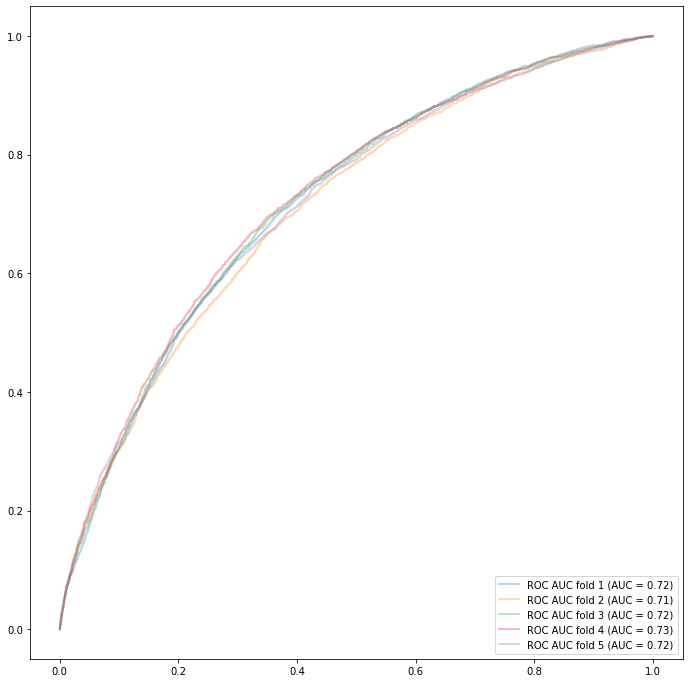

In [51]:
# do k-fold

# make plot
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

# Extract the ids
ids = train_compute_mi_sample['SK_ID_CURR']

# Extract the labels for training
labels = train_compute_mi_sample['TARGET']


features = train_compute_mi_sample.drop(columns = ['SK_ID_CURR', 'TARGET'])

print('Training Data Shape: ', features.shape)

# Extract feature names
feature_names = list(features.columns)

# Convert to np arrays
training_matrix = np.array(features)

# Create the kfold object
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)

#make our model object
model = xgb.XGBClassifier(learning_rate =0.01, n_estimators=100, max_depth=4, min_child_weight=1,
                          subsample=0.8, colsample_bytree=1, objective= 'binary:logistic', nthread=4,
                          scale_pos_weight=2, use_label_encoder =False, eval_metric = "mae")

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

tprs = []
aucs = []


#fold counter
i=1

for train,test in k_fold.split(features,labels):
    prob = model.fit(features.iloc[train],labels.iloc[train]).predict_proba(features.iloc[test])[:,1]
    fpr, tpr, t = roc_curve(labels.iloc[test], prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC AUC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
plt.legend(loc="lower right")
plt.show()

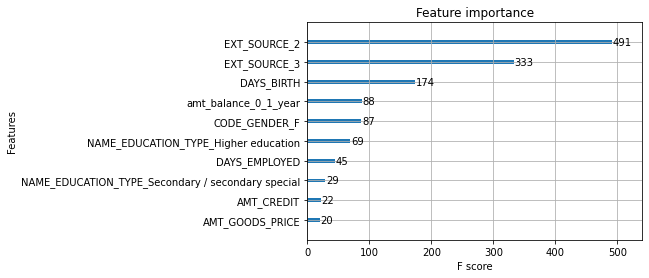

In [52]:
# feature importance
xgb.plot_importance(boost, max_num_features=10) # top 10 most important features
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [53]:
# confusion matrix
print(metrics.confusion_matrix(y_test,preds))

[[2188 3532]
 [ 569 4330]]


In [54]:
# precision and recall
print(metrics.classification_report(y_test, preds, digits=3))

              precision    recall  f1-score   support

           0      0.794     0.383     0.516      5720
           1      0.551     0.884     0.679      4899

    accuracy                          0.614     10619
   macro avg      0.672     0.633     0.597     10619
weighted avg      0.682     0.614     0.591     10619



# Multi-layer Perceptron

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

Note we comment the tuning step here as well

In [56]:
# mlp = MLPClassifier(solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

# # hyperparameters tuning (for hidden layer size and activation function)
# parameter_space = {'hidden_layer_sizes': [(10, ), (30, ), (50,), (70,), (100,)],
#                        'activation': ['relu', 'tanh', 'logistic']}

# # use RandomizedSearchCV to perform cross validation and find the optimal hyper-parameters
# clf = RandomizedSearchCV(mlp, parameter_space, cv=5)
# clf = clf.fit(X_train, y_train)
# print('Best hyperparameters for MLP model are:\n', clf.best_params_)

After tuning, we find that the optimal hyperparameters are 'hidden_layer_sizes' = (70,), 'activation' = 'logistic'.

In [57]:
mlp = MLPClassifier(solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1,
                     hidden_layer_sizes = (70,), activation = 'logistic')
mlp = mlp.fit(X_train, y_train)
preds = mlp.predict(X_test)

Iteration 1, loss = 0.69496487
Iteration 2, loss = 0.70121040
Iteration 3, loss = 0.71043475
Iteration 4, loss = 0.71130187
Iteration 5, loss = 0.71114053
Iteration 6, loss = 0.71102769
Iteration 7, loss = 0.71121051
Iteration 8, loss = 0.71113678
Iteration 9, loss = 0.71130460
Iteration 10, loss = 0.71126482
Iteration 11, loss = 0.71166988
Iteration 12, loss = 0.71049873
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Training Data Shape:  (53094, 168)
Iteration 1, loss = 0.69246245
Iteration 2, loss = 0.69478854
Iteration 3, loss = 0.69595445
Iteration 4, loss = 0.69586123
Iteration 5, loss = 0.69530906
Iteration 6, loss = 0.69324135
Iteration 7, loss = 0.69660059
Iteration 8, loss = 0.69467407
Iteration 9, loss = 0.69342192
Iteration 10, loss = 0.69700256
Iteration 11, loss = 0.69554134
Iteration 12, loss = 0.69464099
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69710374
Iteration 2, loss = 0.71159589
Iteration 3, loss = 0.71475020
Iteration 4, loss = 0.71599684
Iteration 5, loss = 0.71594912
Iteration 6, loss = 0.71202271
Iteration 7, loss = 0.71537276
Iteration 8, loss = 0.71334590
Iteration 9, loss = 0.71209086
Iteration 10, loss = 0.71637904
Iteration 11, loss = 0.71450568
Iteration 12, loss = 0.71355777
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69918313
Iter

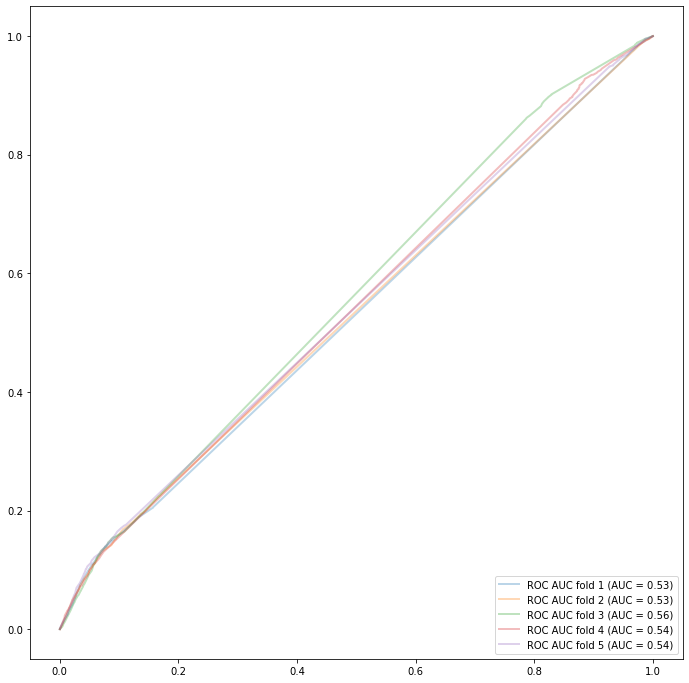

In [58]:
# do k-fold

# make plot
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

# Extract the ids
ids = train_compute_mi_sample['SK_ID_CURR']

# Extract the labels for training
labels = train_compute_mi_sample['TARGET']


features = train_compute_mi_sample.drop(columns = ['SK_ID_CURR', 'TARGET'])

print('Training Data Shape: ', features.shape)

# Extract feature names
feature_names = list(features.columns)

# Convert to np arrays
training_matrix = np.array(features)

# Create the kfold object
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)

#make our model object
model = MLPClassifier(solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1,
                     hidden_layer_sizes = (70,), activation = 'logistic')

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

tprs = []
aucs = []


#fold counter
i=1

for train,test in k_fold.split(features,labels):
    prob = model.fit(features.iloc[train],labels.iloc[train]).predict_proba(features.iloc[test])[:,1]
    fpr, tpr, t = roc_curve(labels.iloc[test], prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC AUC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
plt.legend(loc="lower right")
plt.show()

In [59]:
# confusion matrix
print(metrics.confusion_matrix(y_test,preds))

[[ 176 5544]
 [  55 4844]]


In [60]:
# precision and recall
print(metrics.classification_report(y_test, preds, digits=3))

              precision    recall  f1-score   support

           0      0.762     0.031     0.059      5720
           1      0.466     0.989     0.634      4899

    accuracy                          0.473     10619
   macro avg      0.614     0.510     0.346     10619
weighted avg      0.626     0.473     0.324     10619



We found that the best model is the Random Forest

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

use original dataset to fit the logistic regression

In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=123)

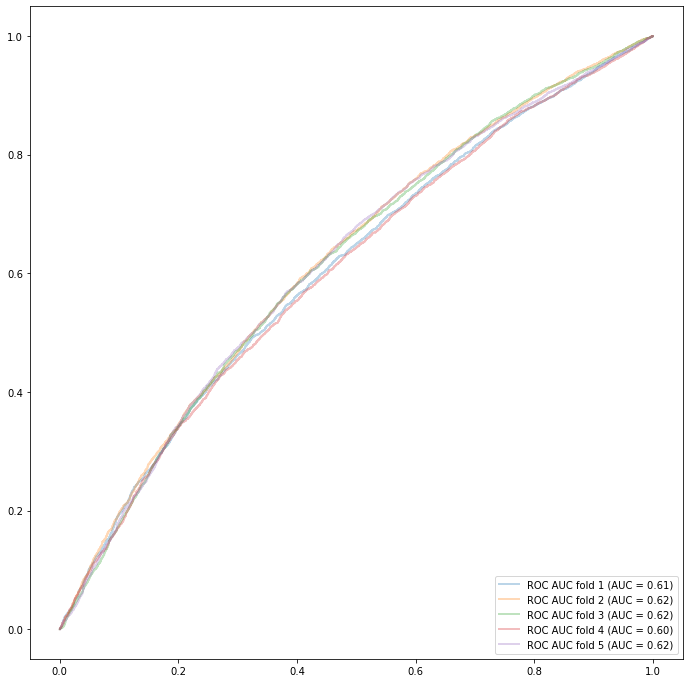

In [63]:
#do k-fold

# make plot
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

# Extract feature names
feature_names = list(features.columns)

# Convert to np arrays
training_matrix = np.array(features)

# Create the kfold object
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)

#make our model object

model = LogisticRegression(random_state=20,n_jobs=-1)

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

tprs = []
aucs = []


#fold counter
i=1

for train,test in k_fold.split(features,labels):
    prob = model.fit(features.iloc[train],labels.iloc[train]).predict_proba(features.iloc[test])[:,1]
    fpr, tpr, t = roc_curve(labels.iloc[test], prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC AUC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
plt.legend(loc="lower right")
plt.show()

In [64]:
model = LogisticRegression(random_state=20,n_jobs=-1)
model = model.fit(X_train, y_train)
preds = model.predict(X_test)

In [65]:
# confusion matrix
print(metrics.confusion_matrix(y_test,preds))

[[4515 1205]
 [3180 1719]]


In [66]:
# precision and recall
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, preds, digits=3))

              precision    recall  f1-score   support

           0      0.587     0.789     0.673      5720
           1      0.588     0.351     0.439      4899

    accuracy                          0.587     10619
   macro avg      0.587     0.570     0.556     10619
weighted avg      0.587     0.587     0.565     10619



Note we are doing worse!

Additional feature engineering and feature selection

Transforming the features into WOEs

In [67]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(features, labels)

clf.woe_df

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,AMT_ANNUITY,"(-0.001, 19867.5]",17700,7992,9708,0.451525,0.548475,0.321934,0.343415,-0.064595,7.920940e-03
1,AMT_ANNUITY,"(19867.5, 30528.0]",17730,8845,8885,0.498872,0.501128,0.356294,0.314302,0.125402,7.920940e-03
2,AMT_ANNUITY,"(30528.0, 225000.0]",17664,7988,9676,0.452219,0.547781,0.321772,0.342283,-0.061794,7.920940e-03
3,AMT_CREDIT,"(44999.999, 341280.0]",17725,8146,9579,0.459577,0.540423,0.328137,0.338852,-0.032132,3.257034e-02
4,AMT_CREDIT,"(341280.0, 675000.0]",18852,9852,9000,0.522597,0.477403,0.396858,0.318370,0.220364,3.257034e-02
5,AMT_CREDIT,"(675000.0, 4050000.0]",16517,6827,9690,0.413332,0.586668,0.275005,0.342778,-0.220294,3.257034e-02
6,AMT_GOODS_PRICE,"(-0.001, 292500.0]",17802,8310,9492,0.466801,0.533199,0.334743,0.335774,-0.003075,3.188895e-02
7,AMT_GOODS_PRICE,"(292500.0, 607500.0]",17638,9214,8424,0.522395,0.477605,0.371158,0.297994,0.219554,3.188895e-02
8,AMT_GOODS_PRICE,"(607500.0, 4050000.0]",17654,7301,10353,0.413561,0.586439,0.294099,0.366232,-0.219350,3.188895e-02
9,AMT_INCOME_TOTAL,"(25649.999, 112500.0]",17737,8443,9294,0.476011,0.523989,0.340101,0.328770,0.033883,7.110211e-03


In [68]:
iv = clf.iv_df
iv

,Variable_Name,Information_Value
22,EXT_SOURCE_2,2.467089e-01
23,EXT_SOURCE_3,2.276210e-01
15,DAYS_BIRTH,7.430904e-02
60,NAME_EDUCATION_TYPE_Higher education,5.098959e-02
83,NAME_INCOME_TYPE_Working,4.986076e-02
153,REGION_RATING_CLIENT_W_CITY,4.514528e-02
18,DAYS_LAST_PHONE_CHANGE,4.273614e-02
16,DAYS_EMPLOYED,4.268536e-02
152,REGION_RATING_CLIENT,4.203729e-02
13,CODE_GENDER_M,4.043846e-02


In [69]:
# perform feature selection based on Information values (remove features with IVs < 0.02 which is useless for prediction)
from pandasql import sqldf
query = 'SELECT Variable_Name FROM iv WHERE Information_Value < 0.02'
dropped_features = sqldf(query)

dropped = dropped_features['Variable_Name'].tolist()
len(dropped)

146

In [70]:
query = 'SELECT * FROM iv WHERE Information_Value >= 0.02'
left_features = sqldf(query)

left_features

,Variable_Name,Information_Value
0,EXT_SOURCE_2,0.246709
1,EXT_SOURCE_3,0.227621
2,DAYS_BIRTH,0.074309
3,NAME_EDUCATION_TYPE_Higher education,0.050990
4,NAME_INCOME_TYPE_Working,0.049861
5,REGION_RATING_CLIENT_W_CITY,0.045145
6,DAYS_LAST_PHONE_CHANGE,0.042736
7,DAYS_EMPLOYED,0.042685
8,REGION_RATING_CLIENT,0.042037
9,CODE_GENDER_M,0.040438


In [71]:
feature_new = features.drop(dropped, axis=1)
feature_new.head()

,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,amt_balance_0_1_year,CODE_GENDER_F,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,ORGANIZATION_TYPE_XNA
0,406597.5,351000.0,-9461,-637,-2120,1,2,2,0,0,0.262949,0.139376,-1134.0,1,0.000,0,1,0,1,0,1,0
26,979992.0,702000.0,-18724,-2628,-1827,1,3,2,0,0,0.548477,0.190706,-161.0,1,0.000,1,0,0,1,0,1,0
40,1193580.0,855000.0,-17482,-1262,-1029,1,2,2,0,0,0.306841,0.320163,-1075.0,1,0.000,0,1,0,0,0,1,0
42,288873.0,238500.0,-13384,-3597,-4409,1,3,3,0,0,0.674203,0.399676,-1480.0,1,626382.855,1,0,0,1,0,1,0
81,252000.0,252000.0,-24794,365243,-4199,0,2,2,0,0,0.023952,0.720944,0.0,0,0.000,1,0,1,0,0,1,1


In [72]:
# transform features based on WOE bins before
feature_new = clf.transform(feature_new)
feature_new.head()

,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,amt_balance_0_1_year,CODE_GENDER_F,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,ORGANIZATION_TYPE_XNA
0,0.220364,0.219554,0.324674,0.247591,0.033127,0.079673,-0.024882,-0.021386,-0.046825,-0.106581,0.627923,0.459195,0.113183,0.095509,-0.080219,0.257364,0.257471,0.079954,0.198983,0.114706,0.11512,0.079632
26,-0.220294,-0.219350,-0.345840,-0.259613,0.203888,0.079673,0.327711,-0.021386,-0.046825,-0.106581,-0.044102,0.459195,0.174794,0.095509,-0.080219,-0.157538,-0.157591,0.079954,0.198983,0.114706,0.11512,0.079632
40,-0.220294,-0.219350,0.013479,0.247591,0.203888,0.079673,-0.024882,-0.021386,-0.046825,-0.106581,0.627923,0.183780,0.113183,0.095509,-0.080219,0.257364,0.257471,0.079954,-0.251623,0.114706,0.11512,0.079632
42,-0.032132,-0.003075,0.013479,-0.259613,-0.240551,0.079673,0.327711,0.358271,-0.046825,-0.106581,-0.605058,0.183780,-0.293420,0.095509,0.452750,-0.157538,-0.157591,0.079954,0.198983,0.114706,0.11512,0.079632
81,-0.032132,-0.003075,-0.345840,0.007498,-0.240551,-0.444069,-0.024882,-0.021386,-0.046825,-0.106581,0.627923,-0.681996,0.174794,-0.276940,-0.080219,-0.157538,-0.157591,-0.446518,-0.251623,0.114706,0.11512,-0.444027


In [73]:
# final feature set
print(feature_new.columns)

Index(['AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'amt_balance_0_1_year',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'ORGANIZATION_TYPE_XNA'],
      dtype='object')


now let's fit logistic regression again

In [74]:
X_train, X_test, y_train, y_test = train_test_split(feature_new, labels, test_size=0.2, random_state=123)

In [75]:
# hyperparameter tuning
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C' : np.logspace(-4, 4, 20)}

# model = LogisticRegression(random_state=20,n_jobs=-1)

# clf = GridSearchCV(model, param_grid, cv=5)
# clf = clf.fit(X_train, y_train)
# print('Best hyperparameters for MLP model are:\n', clf.best_params_)

Best hyperparameters for MLP model are:
 {'C': 0.012742749857031334}

<ipython-input-76-127fa7c20f9a>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


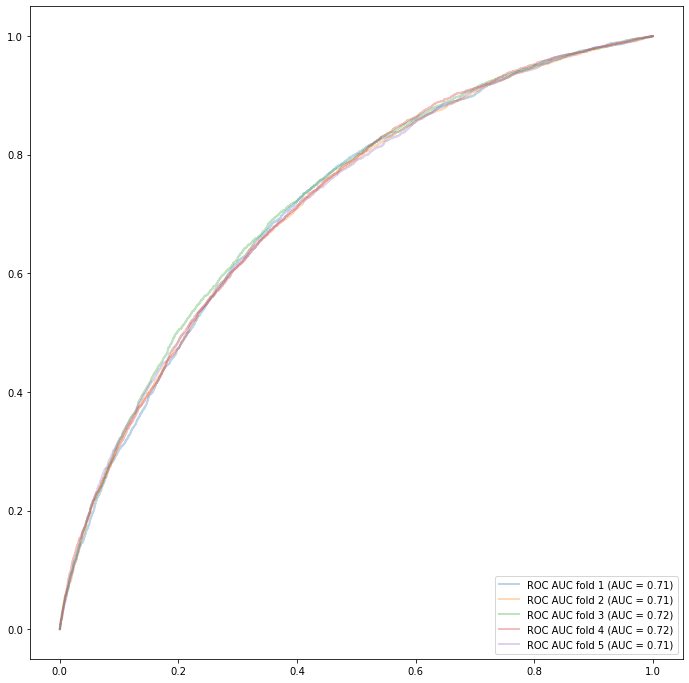

In [76]:
#do k-fold

# make plot
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

# Extract feature names
feature_names = list(feature_new.columns)

# Convert to np arrays
training_matrix = np.array(feature_new)

# Create the kfold object
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)

#make our model object

model = LogisticRegression(random_state=20,n_jobs=-1,C=0.0127)

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

tprs = []
aucs = []


#fold counter
i=1

for train,test in k_fold.split(feature_new,labels):
    prob = model.fit(feature_new.iloc[train],labels.iloc[train]).predict_proba(feature_new.iloc[test])[:,1]
    fpr, tpr, t = roc_curve(labels.iloc[test], prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC AUC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
plt.legend(loc="lower right")
plt.show()

In [77]:
lr = LogisticRegression(random_state=20,n_jobs=-1,C=0.0127)
lr = lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [78]:
# confusion matrix
print(metrics.confusion_matrix(y_test,preds))

[[3997 1723]
 [1821 3078]]


In [79]:
# precision and recall
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, preds, digits=3))

              precision    recall  f1-score   support

           0      0.687     0.699     0.693      5720
           1      0.641     0.628     0.635      4899

    accuracy                          0.666     10619
   macro avg      0.664     0.664     0.664     10619
weighted avg      0.666     0.666     0.666     10619



We have a smaller gap between logistic regression and former models!

In [80]:
# the greater absolute value of coefficient shows greater importance
feature_importance = abs(lr.coef_[0])

# get the index of the most important features
most_important = np.argsort(-feature_importance)

# output most important features
most_important_names = [feature_new.columns[most_important[i]] for i in range(22)]
print(most_important_names)

['EXT_SOURCE_3', 'EXT_SOURCE_2', 'amt_balance_0_1_year', 'FLAG_DOCUMENT_3', 'NAME_EDUCATION_TYPE_Higher education', 'DAYS_EMPLOYED', 'CODE_GENDER_M', 'CODE_GENDER_F', 'DAYS_BIRTH', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_ID_PUBLISH', 'NAME_INCOME_TYPE_Working', 'REG_CITY_NOT_LIVE_CITY', 'REGION_RATING_CLIENT', 'AMT_GOODS_PRICE', 'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE_Pensioner', 'FLAG_EMP_PHONE', 'ORGANIZATION_TYPE_XNA']


In [81]:
# True means positive correlation False means negative correlation
correlation = lr.coef_[0][most_important]
print(correlation > 0)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


# Model Metrics Comparison

In order to compare metrics of these four models clearly. Reference: https://carmenlai.com/2016/11/12/user-churn-prediction-a-machine-learning-workflow.html

In [82]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn_pandas import DataFrameMapper

In [83]:
def roc_curve(y_proba, y_test):
    '''
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve plot.

    INPUT y_proba (numpy array): predicted probabilities
    INPUT y_test (numpy array): true labels
    OUTPUT (lists): lists of true positive rates, false positive rates, thresholds
    '''

    thresholds = np.sort(y_proba)

    tprs = []
    fprs = []

    num_positive_cases = sum(y_test)
    num_negative_cases = len(y_test) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = y_proba >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * y_test)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)

    return tprs, fprs, thresholds.tolist()

def plot_roc_curve(pipeline, y_pred, y_proba, y_test):
    '''
    Plot ROC curve with data from function above.
    '''
    tpr, fpr, thresholds = roc_curve(y_proba, y_test)

    model_name = pipeline.named_steps['classifier'].__class__.__name__
    auc = round(roc_auc_score(y_test, y_pred), 3)
    plt.plot(fpr, tpr, label='{}, AUC: {}'.format(model_name, auc))

In [84]:
def standard_confusion_matrix(y_true, y_pred):
    '''
    Reformat confusion matrix output from sklearn for plotting profit curve.
    '''
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def plot_profit_curve(pipeline, costbenefit_mat, y_proba, y_test):
    '''
    Plot profit curve.

    INPUTS:
    - model object
    - cost benefit matrix in the same format as the confusion matrix above
    - predicted probabilities
    - actual labels
    '''

    # Profit curve data
    profits = [] # one profit value for each T (threshold)
    thresholds = sorted(y_proba, reverse=True)

    # For each threshold, calculate profit - starting with largest threshold
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = standard_confusion_matrix(y_test, y_pred)
        # Calculate total profit for this threshold
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)

    # Profit curve plot
    model_name = pipeline.named_steps['classifier'].__class__.__name__
    max_profit = max(profits)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${} per user'.format(model_name, max_profit))

In [85]:
class Classifiers(object):
    '''
    Classifier object for fitting, storing, and comparing multiple model outputs.
    '''

    def __init__(self, classifier_list):

        self.classifiers = classifier_list
        self.classifier_names = [est.__class__.__name__ for est in self.classifiers]

        # List to store pipeline objects for classifiers
        self.pipelines = []

    def create_pipelines(self):

        for classifier in self.classifiers:
            self.pipelines.append(Pipeline([
                ('classifier', classifier)
                ]))


    def train(self, X_train, y_train, X_train_1, y_train_1):

        for pipeline in self.pipelines[:-1]:
            pipeline.fit(X_train, y_train)
        self.pipelines[-1].fit(X_train_1, y_train_1)

    def accuracy_scores(self, X_test, y_test, X_test_1, y_test_1):

        # Lists to store classifier test scores
        self.accuracies = []

        for pipeline in self.pipelines[:-1]:
            self.accuracies.append(pipeline.score(X_test, y_test))
        self.accuracies.append(self.pipelines[-1].score(X_test_1, y_test_1))
        # Print results
        accuracy_df = pd.DataFrame(zip(self.classifier_names, self.accuracies))
        accuracy_df.columns = ['Classifier', 'Test Accuracies']

        print(accuracy_df)


    def plot_roc_curve(self, X_test, y_test, X_test_1, y_test_1):

        # Plot ROC curve for each classifier
        plt.figure(figsize=(10, 10))
        for pipeline in self.pipelines[:-1]:
            y_pred = pipeline.predict(X_test)
            y_proba = pipeline.predict_proba(X_test)[:, 1]
            plot_roc_curve(pipeline, y_pred, y_proba, y_test)
        y_pred = self.pipelines[-1].predict(X_test_1)
        y_proba = self.pipelines[-1].predict_proba(X_test_1)[:, 1]
        plot_roc_curve(self.pipelines[-1], y_pred, y_proba, y_test_1)
        
        # 45 degree line
        x = np.linspace(0, 1.0, 20)
        plt.plot(x, x, color='grey', ls='--')

        # Plot labels
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity, Recall)')
        plt.title('ROC Plots')
        plt.legend(loc='lower right')
        plt.show()


    def plot_profit_curve(self, costbenefit_mat, X_test, y_test, X_test_1, y_test_1):

        # Plot profit curve for each classifier
        plt.figure(figsize=(10, 10))
        for pipeline in self.pipelines[:-1]:
            y_proba = pipeline.predict_proba(X_test)[:, 1]
            plot_profit_curve(pipeline, costbenefit_mat, y_proba, y_test)
        y_proba = self.pipelines[-1].predict_proba(X_test_1)[:, 1]
        plot_profit_curve(self.pipelines[-1], costbenefit_mat, y_proba, y_test_1)
        
        # Plot labels
        plt.xlabel('Percentage of test instances (decreasing by score)')
        plt.ylabel('Profit')
        plt.title('Profit Curves')
        plt.legend(loc='lower left')
        plt.show()

In [86]:
# List of classifiers
rf = RandomForestClassifier(n_estimators=100, 
                               max_depth = 3, min_samples_split = 200, min_samples_leaf = 50)
boost = xgb.XGBClassifier(learning_rate =0.01, n_estimators=100, max_depth=4, min_child_weight=1,
                          subsample=0.8, colsample_bytree=1, objective= 'binary:logistic', nthread=4,
                          scale_pos_weight=2, use_label_encoder =False, eval_metric = "mae")
mlp = MLPClassifier(solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1,
                     hidden_layer_sizes = (70,), activation = 'logistic')
lr = LogisticRegression(random_state=20,n_jobs=-1,C=0.0127)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=123)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(feature_new, labels, test_size=0.2, random_state=123)

clfs = Classifiers([rf, boost, mlp, lr])

clfs.create_pipelines()

clfs.train(X_train, y_train, X_train_1, y_train_1)

Iteration 1, loss = 0.69496487
Iteration 2, loss = 0.70121040
Iteration 3, loss = 0.71043475
Iteration 4, loss = 0.71130187
Iteration 5, loss = 0.71114053
Iteration 6, loss = 0.71102769
Iteration 7, loss = 0.71121051
Iteration 8, loss = 0.71113678
Iteration 9, loss = 0.71130460
Iteration 10, loss = 0.71126482
Iteration 11, loss = 0.71166988
Iteration 12, loss = 0.71049873
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Accuracy comparison

In [87]:
clfs.accuracy_scores(X_test, y_test, X_test_1, y_test_1)

               Classifier  Test Accuracies
0  RandomForestClassifier  0.658537       
1  XGBClassifier           0.613805       
2  MLPClassifier           0.472738       
3  LogisticRegression      0.666259       


ROC comparison

<ipython-input-85-66fbd987cb09>:64: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


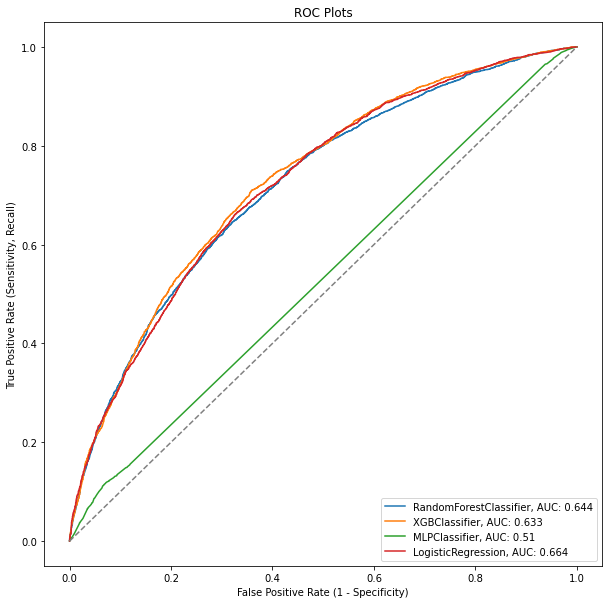

In [88]:
clfs.plot_roc_curve(X_test, y_test, X_test_1, y_test_1)

Profit curve comparison

<ipython-input-85-66fbd987cb09>:82: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


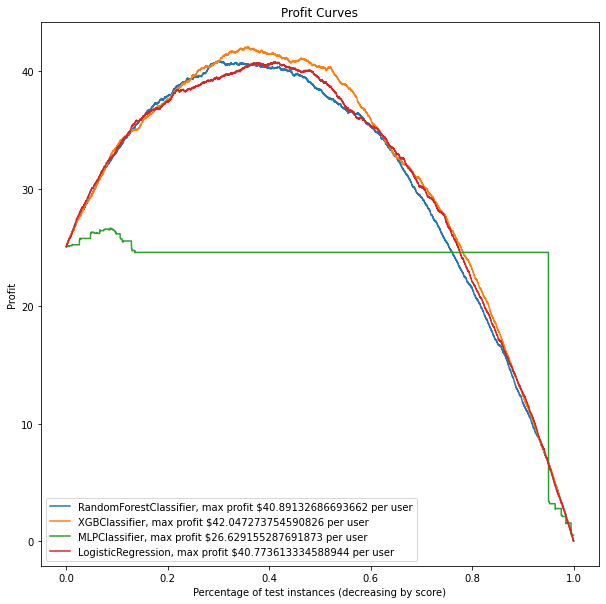

In [89]:
# Define cost-benefit matrix with input from business managers, other stakeholders, etc.
costbenefit_mat = np.array([[0, 0],
                            [-150, 175]])

# Plot profit curves
clfs.plot_profit_curve(costbenefit_mat, X_test, y_test, X_test_1, y_test_1)